In [29]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import Irish Names

In [30]:
#Import Girl and Boy name datasets in csv format for Ireland as dataframes
irl_GirlNames_csv = pd.read_csv('Ireland_Girls_Names.csv')
irl_BoyNames_csv = pd.read_csv('Ireland_Boys_Names.csv')

In [31]:
#print first 5 values to determine format of dataframes
print(irl_GirlNames_csv.head())

                                           Statistic  Year   Names    UNIT  \
0  Girls Names in Ireland with 3 or More Occurrences  1964   Sarah  Number   
1  Girls Names in Ireland with 3 or More Occurrences  1964    Emma  Number   
2  Girls Names in Ireland with 3 or More Occurrences  1964    Ella  Number   
3  Girls Names in Ireland with 3 or More Occurrences  1964   Katie  Number   
4  Girls Names in Ireland with 3 or More Occurrences  1964  Sophie  Number   

   VALUE  
0  137.0  
1    8.0  
2    NaN  
3    NaN  
4    NaN  


In [32]:
#call shape method to determine size of dataset
irl_GirlNames_csv.shape

(402056, 5)

In [413]:
irl_GirlNames_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402056 entries, 0 to 402055
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Statistic  402056 non-null  object 
 1   Year       402056 non-null  int64  
 2   Names      402056 non-null  object 
 3   UNIT       402056 non-null  object 
 4   VALUE      86694 non-null   float64
 5   Gender     402056 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 18.4+ MB


In [221]:
#create new dataset where "statistics" and "UNIT" columns are omitted as they are not required/helpful. All values are the same for these columns.
irl_GirlNames = irl_GirlNames_csv.loc[:,["Year","Names","VALUE"]]
print(irl_GirlNames.head())

   Year   Names  VALUE
0  1964   Sarah  137.0
1  1964    Emma    8.0
2  1964    Ella    NaN
3  1964   Katie    NaN
4  1964  Sophie    NaN


In [222]:
#csv that was imported has duplicate row on "Year" and "Names". First row has the count of baby registered with that name that year. The second row has where that name ranked that year. 
#For this analysis, we're only interested the the count so I will drop duplicates on "Year" and "Names"
irl_GirlNames = irl_GirlNames.drop_duplicates(subset=["Year","Names"])

In [223]:
#check size of updated dataframe
irl_GirlNames.shape

(201028, 3)

In [226]:
#Rows where there were less than 3 babies registered with that name that year are reported as 'NaN'. Here I update that value to zero.
irl_GirlNames = irl_GirlNames.fillna(0)
print(irl_GirlNames)

        Year    Names  VALUE
0       1964    Sarah  137.0
1       1964     Emma    8.0
2       1964     Ella    0.0
3       1964    Katie    0.0
4       1964   Sophie    0.0
...      ...      ...    ...
201023  2021    Vaeda    4.0
201024  2021  Viviana    3.0
201025  2021   Zariah    3.0
201026  2021      Zia    3.0
201027  2021     Zoha    3.0

[201028 rows x 3 columns]


In [258]:
#the csvs I have for Girl and Boy data in Ireland are in the same format. As I want to clean the data for both datasets and make sure they are formatted the same, I will create a function as follows
#Add a gender column
#Remove columns that are not required
#Drop duplicates
#Replace NaN values with zero
#Change 'VALUE' column name to 'Count' to be more explicit
def clean_data_irl(csv_dataframe,gender):
    csv_dataframe['Gender'] = gender
    csv_dataframe = csv_dataframe.loc[:,["Year","Names","Gender","VALUE"]]
    csv_dataframe = csv_dataframe.drop_duplicates(subset=["Year","Names"])
    csv_dataframe = csv_dataframe.fillna(0)
    csv_dataframe.rename(columns={'VALUE':'Count'},inplace=True)
    return csv_dataframe

In [265]:
#run clean_data_irl function on the Boy Names dataset
irl_BoyNames = clean_data_irl(irl_BoyNames_csv,"M")
print(irl_BoyNames)

        Year    Names Gender   Count
0       1964     Jack      M     0.0
1       1964     Sean      M   171.0
2       1964    Conor      M    97.0
3       1964   Daniel      M   395.0
4       1964    James      M  1554.0
...      ...      ...    ...     ...
145865  2021    Royce      M     3.0
145866  2021    Rudra      M     3.0
145867  2021    Ryker      M     3.0
145868  2021  Sharvil      M     3.0
145869  2021     Sheá      M     3.0

[145870 rows x 4 columns]


In [266]:
#run clean_data_irl function on the Boy Names dataset
irl_GirlNames = clean_data_irl(irl_GirlNames_csv,"F")
print(irl_GirlNames)

        Year    Names Gender  Count
0       1964    Sarah      F  137.0
1       1964     Emma      F    8.0
2       1964     Ella      F    0.0
3       1964    Katie      F    0.0
4       1964   Sophie      F    0.0
...      ...      ...    ...    ...
201023  2021    Vaeda      F    4.0
201024  2021  Viviana      F    3.0
201025  2021   Zariah      F    3.0
201026  2021      Zia      F    3.0
201027  2021     Zoha      F    3.0

[201028 rows x 4 columns]


Join Girls list with Boys list

In [267]:
#Combine the Girl Names and Boy Names dataset for one dataset with all data for Ireland
irl_AllNames = pd.concat([irl_GirlNames,irl_BoyNames])
print(irl_AllNames)

        Year    Names Gender  Count
0       1964    Sarah      F  137.0
1       1964     Emma      F    8.0
2       1964     Ella      F    0.0
3       1964    Katie      F    0.0
4       1964   Sophie      F    0.0
...      ...      ...    ...    ...
145865  2021    Royce      M    3.0
145866  2021    Rudra      M    3.0
145867  2021    Ryker      M    3.0
145868  2021  Sharvil      M    3.0
145869  2021     Sheá      M    3.0

[346898 rows x 4 columns]


Import US Names

In [400]:
###US DATA
us_names_full = pd.read_csv('babyNamesUSYOB-full.csv')
print(us_names_full)

         YearOfBirth       Name Sex  Number
0               1880       Mary   F    7065
1               1880       Anna   F    2604
2               1880       Emma   F    2003
3               1880  Elizabeth   F    1939
4               1880     Minnie   F    1746
...              ...        ...  ..     ...
1858684         2015     Zykell   M       5
1858685         2015     Zyking   M       5
1858686         2015      Zykir   M       5
1858687         2015      Zyrus   M       5
1858688         2015       Zyus   M       5

[1858689 rows x 4 columns]


In [401]:
###US DATA
us_AllNames = us_names_full[us_names_full['YearOfBirth'] >= 1964]
print(us_AllNames)

         YearOfBirth      Name Sex  Number
621036          1964      Lisa   F   54277
621037          1964      Mary   F   40985
621038          1964     Susan   F   31515
621039          1964     Karen   F   30247
621040          1964  Patricia   F   26087
...              ...       ...  ..     ...
1858684         2015    Zykell   M       5
1858685         2015    Zyking   M       5
1858686         2015     Zykir   M       5
1858687         2015     Zyrus   M       5
1858688         2015      Zyus   M       5

[1237653 rows x 4 columns]


In [402]:
###US DATA
#Update column names to match irl_ALLNames dataset
us_AllNames.rename(columns={'YearOfBirth':'Year'},inplace=True)
us_AllNames.rename(columns={'Name':'Names'},inplace=True)
us_AllNames.rename(columns={'Sex':'Gender'},inplace=True)
us_AllNames.rename(columns={'Number':'Count'},inplace=True)
print(us_AllNames)

         Year     Names Gender  Count
621036   1964      Lisa      F  54277
621037   1964      Mary      F  40985
621038   1964     Susan      F  31515
621039   1964     Karen      F  30247
621040   1964  Patricia      F  26087
...       ...       ...    ...    ...
1858684  2015    Zykell      M      5
1858685  2015    Zyking      M      5
1858686  2015     Zykir      M      5
1858687  2015     Zyrus      M      5
1858688  2015      Zyus      M      5

[1237653 rows x 4 columns]


C:\Users\LWhyte\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [403]:
us_names_2016 = pd.read_csv('yob2016.csv', names=['Names','Gender','Count'])
us_names_2017 = pd.read_csv('yob2017.csv', names=['Names','Gender','Count'])
us_names_2018 = pd.read_csv('yob2018.csv', names=['Names','Gender','Count'])
us_names_2019 = pd.read_csv('yob2019.csv', names=['Names','Gender','Count'])
us_names_2020 = pd.read_csv('yob2020.csv', names=['Names','Gender','Count'])
us_names_2021 = pd.read_csv('yob2021.csv', names=['Names','Gender','Count'])
print(us_AllNames)

         Year     Names Gender  Count
621036   1964      Lisa      F  54277
621037   1964      Mary      F  40985
621038   1964     Susan      F  31515
621039   1964     Karen      F  30247
621040   1964  Patricia      F  26087
...       ...       ...    ...    ...
1858684  2015    Zykell      M      5
1858685  2015    Zyking      M      5
1858686  2015     Zykir      M      5
1858687  2015     Zyrus      M      5
1858688  2015      Zyus      M      5

[1237653 rows x 4 columns]


In [404]:
def us_names_year(year_csv,year):
    year_csv['Year'] = year
    csv_dataframe = year_csv.loc[:,["Year","Names","Gender","Count"]]
    #csv_dataframe = csv_dataframe.drop_duplicates(subset=["Year","Names"])
    #csv_dataframe = csv_dataframe.fillna(0)
    #csv_dataframe.rename(columns={'VALUE':'Count'},inplace=True)
    return csv_dataframe
print(us_AllNames)

         Year     Names Gender  Count
621036   1964      Lisa      F  54277
621037   1964      Mary      F  40985
621038   1964     Susan      F  31515
621039   1964     Karen      F  30247
621040   1964  Patricia      F  26087
...       ...       ...    ...    ...
1858684  2015    Zykell      M      5
1858685  2015    Zyking      M      5
1858686  2015     Zykir      M      5
1858687  2015     Zyrus      M      5
1858688  2015      Zyus      M      5

[1237653 rows x 4 columns]


In [407]:
us_names_2016 = us_names_year(us_names_2016,2016)
us_names_2017 = us_names_year(us_names_2017,2017)
us_names_2018 = us_names_year(us_names_2018,2018)
us_names_2019 = us_names_year(us_names_2019,2019)
us_names_2020 = us_names_year(us_names_2020,2020)
us_names_2021 = us_names_year(us_names_2021,2021)

In [409]:
us_AllNames = pd.concat([us_AllNames, us_names_2016, us_names_2017,us_names_2018,us_names_2019,us_names_2020,us_names_2021])
print(us_AllNames)

        Year     Names Gender  Count
621036  1964      Lisa      F  54277
621037  1964      Mary      F  40985
621038  1964     Susan      F  31515
621039  1964     Karen      F  30247
621040  1964  Patricia      F  26087
...      ...       ...    ...    ...
31532   2021    Zyeire      M      5
31533   2021      Zyel      M      5
31534   2021     Zyian      M      5
31535   2021     Zylar      M      5
31536   2021       Zyn      M      5

[1430603 rows x 4 columns]


Create Dataset of Pop Culture Names for Comparison

In [56]:
kardashians = {'name': ['Kris','Kourtney', 'Kim', 'Khloe', 'Rob', 'Kendall', 'Kylie','Mason','Penelope','Reign','North','Saint','Chicago','Psalm','Dream','True','Stormi'],
              'active_from': [2007,2005,2003,2007,2007,2007,2007,2009,2012,2014,2013,2015,2018,2019,2016,2018,2018],
              'gender': ['F','F','F','F','M','F','F','M', 'F','M','F','M','F','M','F','F','F']}

In [57]:
beckhams = {'name': ['Brooklyn','Romeo', 'Cruz', 'Harper'],
              'active_from': [1999,2002,2005,2011],
              'gender': ['M','M','M','F']}

In [58]:
royals = {'name': ['William','Harry', 'Peter','Zara','Beatrice', 'Eugenie','George','Charlotte','Louis','Archie','Lilibet'],
              'active_from': [1982,1984,1977,1981,1988,1990,2013,2015,2018,2019,2021],
              'gender': ['M','M','M','F','F','F','M','F','M','M','F']}

In [60]:
one_direction = {'name': ['Harry','Niall','Louis','Zayn','Liam'],
              'active_from': [2010,2010,2010,2010,2010],
              'gender': ['M','M','M','M','M']}

In [61]:
solo_singers = {'name': ['Britney','Rihanna','Beyonce','Ariana','Adele','Taylor'],
              'active_from': [1998,2003,1997,2008,2006,2004],
              'gender': ['F','F','F','F','F','F']}

In [334]:
#Created a function to convert these dictionaries to dataframe to better read the data
#Convert dictionary to dataframe
#Add a 'category' column to help refine the data
#sort by gender and year
#adjust columns to preferred order 
def dict_to_dataframe(dict_name, category_name):
    df = pd.DataFrame(dict_name)
    df["category"] = category_name
    #df = df.sort_values(by=["gender","active_from"])
    df = df.loc[:,["category","name","gender","active_from"]]
    #df = df.set_index("name")
    return df

In [335]:
kardashians_df = dict_to_dataframe(kardashians,"Kardashians")
print(kardashians_df)
#kardashians_df[kardashians_df["name"].isin(["Kim","Khloe"])]
#kardashians_df.[[kardashians_df["name"].isin(["Kim","Khloe"])]

       category      name gender  active_from
0   Kardashians      Kris      F         2007
1   Kardashians  Kourtney      F         2005
2   Kardashians       Kim      F         2003
3   Kardashians     Khloe      F         2007
4   Kardashians       Rob      M         2007
5   Kardashians   Kendall      F         2007
6   Kardashians     Kylie      F         2007
7   Kardashians     Mason      M         2009
8   Kardashians  Penelope      F         2012
9   Kardashians     Reign      M         2014
10  Kardashians     North      F         2013
11  Kardashians     Saint      M         2015
12  Kardashians   Chicago      F         2018
13  Kardashians     Psalm      M         2019
14  Kardashians     Dream      F         2016
15  Kardashians      True      F         2018
16  Kardashians    Stormi      F         2018


In [336]:
beckhams_df = dict_to_dataframe(beckhams,"Beckhams")

In [311]:
royals_df = dict_to_dataframe(royals,"Royals")

In [312]:
one_direction_df = dict_to_dataframe(one_direction, "One Direction")

In [313]:
solo_singers_df = dict_to_dataframe(solo_singers, "Solo Singers")

In [337]:
pop_culture_names = pd.concat([kardashians_df,beckhams_df,royals_df,one_direction_df,solo_singers_df])
#pop_culture_names = pop_culture_names.set_index(['category','name'])
print(pop_culture_names)

         category       name gender  active_from
0     Kardashians       Kris      F         2007
1     Kardashians   Kourtney      F         2005
2     Kardashians        Kim      F         2003
3     Kardashians      Khloe      F         2007
4     Kardashians        Rob      M         2007
5     Kardashians    Kendall      F         2007
6     Kardashians      Kylie      F         2007
7     Kardashians      Mason      M         2009
8     Kardashians   Penelope      F         2012
9     Kardashians      Reign      M         2014
10    Kardashians      North      F         2013
11    Kardashians      Saint      M         2015
12    Kardashians    Chicago      F         2018
13    Kardashians      Psalm      M         2019
14    Kardashians      Dream      F         2016
15    Kardashians       True      F         2018
16    Kardashians     Stormi      F         2018
0        Beckhams   Brooklyn      M         1999
1        Beckhams      Romeo      M         2002
2        Beckhams   

In [315]:
kendall = irl_AllNames[irl_AllNames["Names"] == "Kendall"]

In [316]:
def plot_name(dataset, name, gender):
    df = dataset[(dataset['Names'] == name) & (dataset['Gender'] == gender)]
    plt.plot(df["Year"],df["Count"])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(name + " - " + gender)
    plt.show()

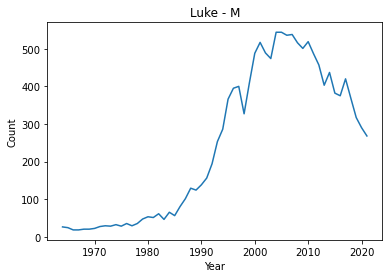

In [317]:
plot_name(irl_AllNames,"Luke", "M")

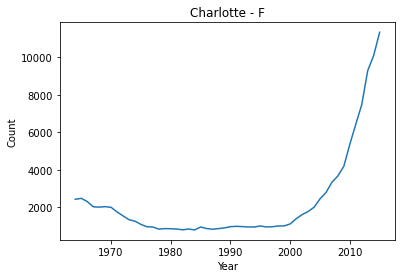

In [380]:
plot_name(us_AllNames,"Charlotte", "F")

In [369]:
#Function for full Pop Culture names dataset
def analyse_name_full(dataset, name, gender, category, year_span):
    names_df = dataset[(dataset['Names'] == name) & (dataset['Gender'] == gender)]
    celeb_df = pop_culture_names[(pop_culture_names['name'] == name) & (pop_culture_names['category'] == category)]
    celeb_dict = celeb_df.to_dict('list')
    plt.plot(names_df["Year"],names_df["Count"])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(name + " - " + gender)
    span_start = celeb_dict['active_from'][0]
    span_end = celeb_dict['active_from'][0] + year_span    
    plt.axvspan(span_start,span_end, color="#B3DE69", alpha=0.3)
    plt.show()

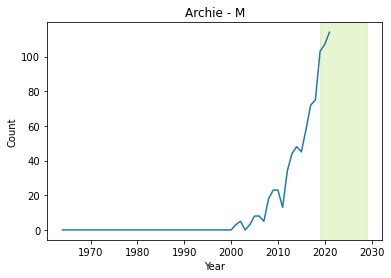

In [370]:
analyse_name_full(irl_AllNames,"Archie","M","Royals",10)

In [371]:
#Function for specific Pop Culture names dataset
def analyse_name_specific(dataset, category_df, name, gender, year_span):
    names_df = dataset[(dataset['Names'] == name) & (dataset['Gender'] == gender)]
    celeb_df = category_df[category_df['name'] == name]
    celeb_dict = celeb_df.to_dict('list')
    plt.plot(names_df["Year"],names_df["Count"])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(name + " - " + gender)
    span_start = celeb_dict['active_from'][0]
    span_end = celeb_dict['active_from'][0] + year_span    
    plt.axvspan(span_start,span_end, color="#B3DE69", alpha=0.3)
    plt.show()

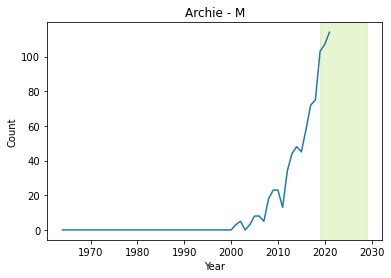

In [372]:
analyse_name_specific(irl_AllNames, royals_df, "Archie", "M", 10)

In [339]:
celeb_dict = beckhams_df.to_dict('list')
print(celeb_dict['category'])

['Beckhams', 'Beckhams', 'Beckhams', 'Beckhams']


In [340]:
for row in beckhams_df.iterrows() :
    #celeb_df = pop_culture_names[(pop_culture_names['name'] == name) & (pop_culture_names['category'] == category)]
    celeb_dict = beckhams_df.to_dict('list')
    print(celeb_dict)

{'category': ['Beckhams', 'Beckhams', 'Beckhams', 'Beckhams'], 'name': ['Brooklyn', 'Romeo', 'Cruz', 'Harper'], 'gender': ['M', 'M', 'M', 'F'], 'active_from': [1999, 2002, 2005, 2011]}
{'category': ['Beckhams', 'Beckhams', 'Beckhams', 'Beckhams'], 'name': ['Brooklyn', 'Romeo', 'Cruz', 'Harper'], 'gender': ['M', 'M', 'M', 'F'], 'active_from': [1999, 2002, 2005, 2011]}
{'category': ['Beckhams', 'Beckhams', 'Beckhams', 'Beckhams'], 'name': ['Brooklyn', 'Romeo', 'Cruz', 'Harper'], 'gender': ['M', 'M', 'M', 'F'], 'active_from': [1999, 2002, 2005, 2011]}
{'category': ['Beckhams', 'Beckhams', 'Beckhams', 'Beckhams'], 'name': ['Brooklyn', 'Romeo', 'Cruz', 'Harper'], 'gender': ['M', 'M', 'M', 'F'], 'active_from': [1999, 2002, 2005, 2011]}


In [341]:
len(beckhams_df.index)

4

In [342]:
print(beckhams_df)

   category      name gender  active_from
0  Beckhams  Brooklyn      M         1999
1  Beckhams     Romeo      M         2002
2  Beckhams      Cruz      M         2005
3  Beckhams    Harper      F         2011


In [358]:
i = 0
while i < len(beckhams_df.index) :
    one_row_df = beckhams_df.iloc[[i]]
    one_row_dict = one_row_df.to_dict('list')
    i = i + 1
    print(one_row_dict)

{'category': ['Beckhams'], 'name': ['Brooklyn'], 'gender': ['M'], 'active_from': [1999]}
{'category': ['Beckhams'], 'name': ['Romeo'], 'gender': ['M'], 'active_from': [2002]}
{'category': ['Beckhams'], 'name': ['Cruz'], 'gender': ['M'], 'active_from': [2005]}
{'category': ['Beckhams'], 'name': ['Harper'], 'gender': ['F'], 'active_from': [2011]}


In [377]:
def analyse_group(country_df, category_df,year_span) :
    i = 0
    while i < len(category_df.index) :
        one_row_df = category_df.iloc[[i]]
        one_row_dict = one_row_df.to_dict('list')
        analyse_name_specific(country_df, category_df, one_row_dict['name'][0], one_row_dict['gender'][0], year_span)
        i = i + 1
        #print(one_row_dict)

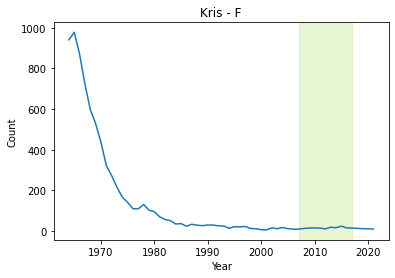

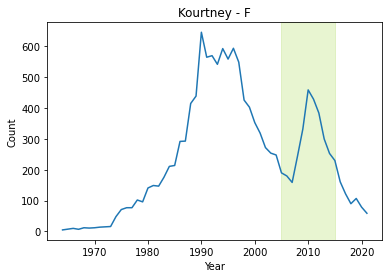

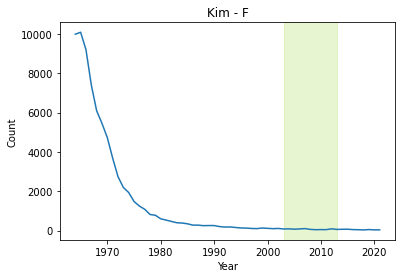

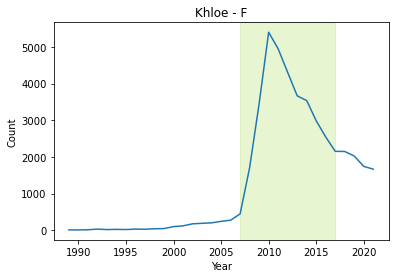

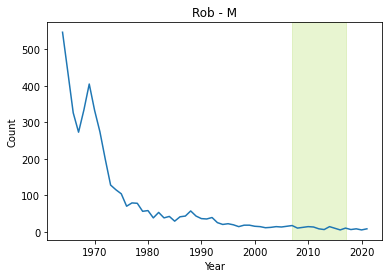

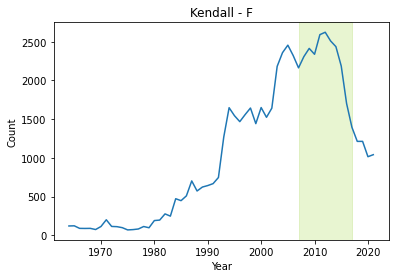

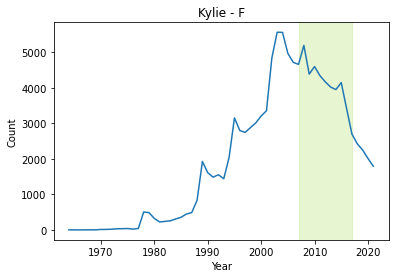

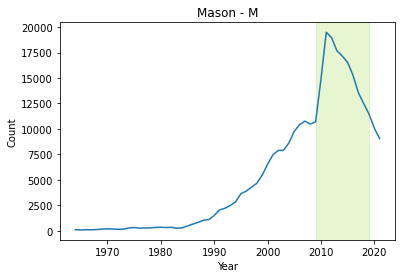

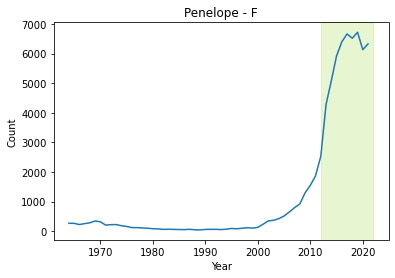

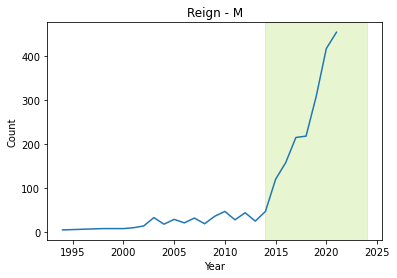

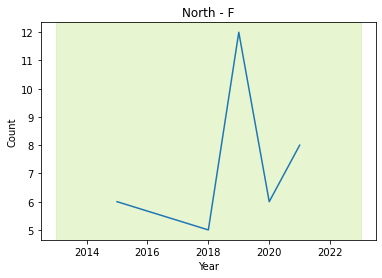

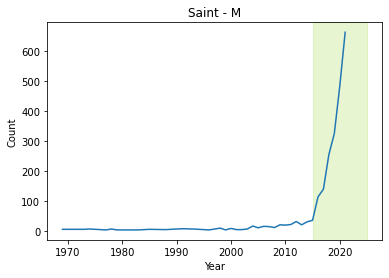

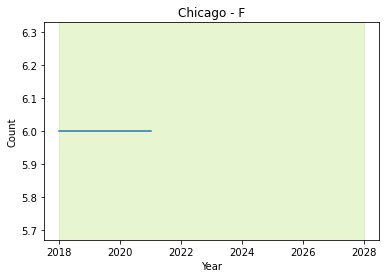

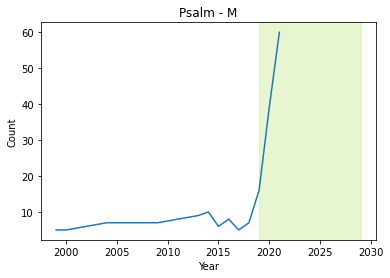

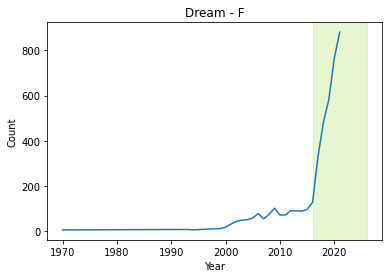

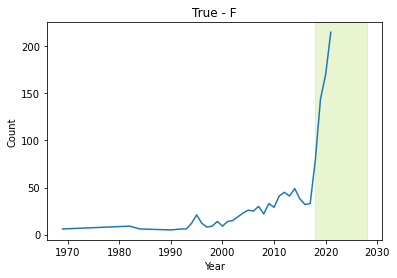

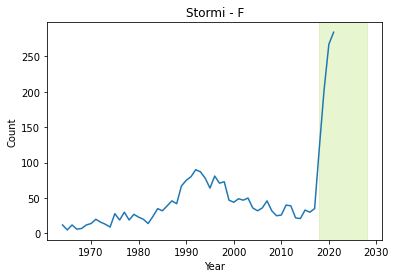

In [411]:
analyse_group(us_AllNames,kardashians_df,10)

In [412]:
names_df = us_AllNames[(us_AllNames['Names'] == 'North') & (us_AllNames['Gender'] == 'F')]
print(names_df)

         Year  Names Gender  Count
1841552  2015  North      F      6
17450    2018  North      F      5
8953     2019  North      F     12
14615    2020  North      F      6
11810    2021  North      F      8
